In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

2025-05-27 11:17:09.856899: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 11:17:09.857507: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 11:17:09.859902: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 11:17:09.866129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748333829.876735   80852 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748333829.87

In [2]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [3]:
img_size = 224
batch_size = 16
epochs = 30
num_classes = 10
base_dir = 'images_the_boys'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 260 images belonging to 10 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 58 images belonging to 10 classes.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


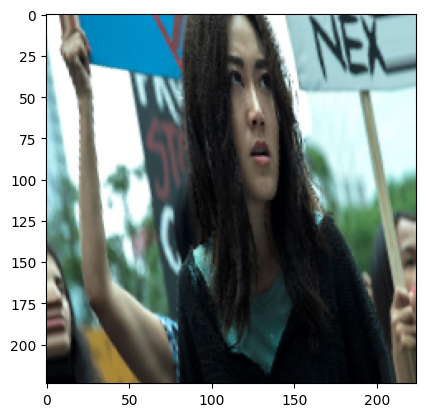

In [7]:
import matplotlib.pyplot as plt

for images, labels in train_generator:
    print(labels[1])
    plt.imshow(images[4])
    plt.show()
    break

## Модель

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

/home/georgie/jupyter_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-27 11:17:11.908508: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### Обучение

In [10]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

In [11]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop]
)

/home/georgie/jupyter_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 445ms/step - accuracy: 0.1005 - loss: 2.3425 - val_accuracy: 0.1552 - val_loss: 2.2682
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 403ms/step - accuracy: 0.1378 - loss: 2.2670 - val_accuracy: 0.1379 - val_loss: 2.2659
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.1810 - loss: 2.2511 - val_accuracy: 0.1379 - val_loss: 2.2565
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step - accuracy: 0.1511 - loss: 2.2401 - val_accuracy: 0.1724 - val_loss: 2.2522
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 419ms/step - accuracy: 0.1572 - loss: 2.2144 - val_accuracy: 0.1379 - val_loss: 2.2178
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 434ms/step - accuracy: 0.2457 - loss: 2.1435 - val_accuracy: 0.2069 - val_loss: 2.2411
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 409ms/step - accuracy: 0.2353 - loss: 2.0934 - val_accuracy: 0.1724 - val_loss: 2.2327
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step - accuracy: 0.2416 - loss: 2.0445 - val_accuracy: 0.

In [13]:
model.save('model.h5')

In [14]:
import json
class_indices = train_generator.class_indices
class_names = {str(v): k for k, v in class_indices.items()}
with open('labels.json', 'w') as f:
    json.dump(class_names, f)